In [2]:
#install yahoo finance package
%pip install yfinance

SyntaxError: ignored

In [3]:
#import data from yahoo finance
import yfinance as yf
df = yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-11-22,15782.300781,16253.047852,15656.606445,16189.769531,16189.769531,30726828760
2022-11-23,16195.588867,16638.193359,16170.502930,16610.707031,16610.707031,32958875628
2022-11-24,16611.636719,16771.474609,16501.767578,16604.464844,16604.464844,26129037414


In [5]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error


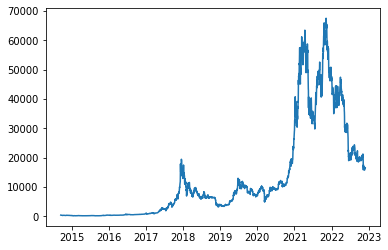

In [6]:
#plot current graph
plt.plot(df.index, df['Adj Close'])
plt.show()

In [7]:
#train test split

# 90% of data as training data
to_row = int(len(df)*0.9)

training_data = list(df[0:to_row]['Adj Close']) #beginning to 90% of data

# 10% as testing data
testing_data = list(df[to_row:]['Adj Close']) #from last 10% of the data at the end
training_data

[457.3340148925781,
 424.44000244140625,
 394.7959899902344,
 408.90399169921875,
 398.8210144042969,
 402.1520080566406,
 435.7909851074219,
 423.2049865722656,
 411.5740051269531,
 404.42498779296875,
 399.5199890136719,
 377.1809997558594,
 375.4670104980469,
 386.9440002441406,
 383.614990234375,
 375.0719909667969,
 359.5119934082031,
 328.8659973144531,
 320.510009765625,
 330.0790100097656,
 336.18701171875,
 352.94000244140625,
 365.0260009765625,
 361.56201171875,
 362.29901123046875,
 378.54901123046875,
 390.41400146484375,
 400.8699951171875,
 394.77301025390625,
 382.5559997558594,
 383.75799560546875,
 391.4419860839844,
 389.5459899902344,
 382.8450012207031,
 386.4750061035156,
 383.1579895019531,
 358.4169921875,
 358.3450012207031,
 347.27099609375,
 354.7040100097656,
 352.989013671875,
 357.6180114746094,
 335.59100341796875,
 345.30499267578125,
 338.3210144042969,
 325.7489929199219,
 325.8919982910156,
 327.5539855957031,
 330.49200439453125,
 339.4859924316406,


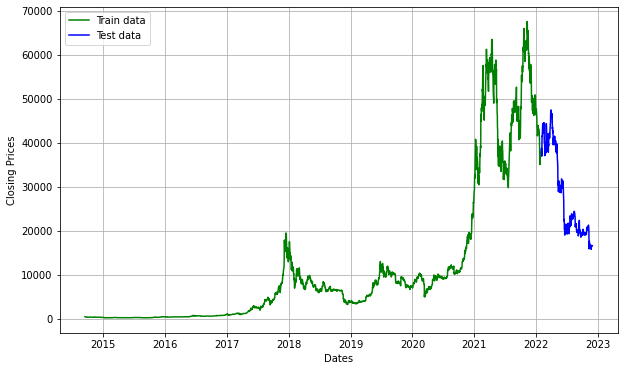

In [8]:
#training set and testing set graph
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'], 'green', label="Train data")
plt.plot(df[to_row:]['Adj Close'], 'blue', label="Test data")
plt.legend()

In [9]:
model_predictions = []
n_test_obser = len(testing_data)

In [12]:
#ARIMA Training

for i in range(n_test_obser):
  model = ARIMA(training_data, order = (4,1,0)) #p,d,q
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0] #prediction of first value
  model_predictions.append(yhat)
  actual_test_value = testing_data[i] #actual data
  training_data.append(actual_test_value) #update training data
  #break

In [13]:
#summary

print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2992
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -24239.675
Method:                       css-mle   S.D. of innovations            798.357
Date:                Sun, 27 Nov 2022   AIC                          48491.349
Time:                        04:57:32   BIC                          48527.371
Sample:                             1   HQIC                         48504.308
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3692     15.012      0.358      0.721     -24.055      34.793
ar.L1.D.y     -0.0261      0.018     -1.427      0.154      -0.062       0.010
ar.L2.D.y      0.0048      0.018      0.260      0.7

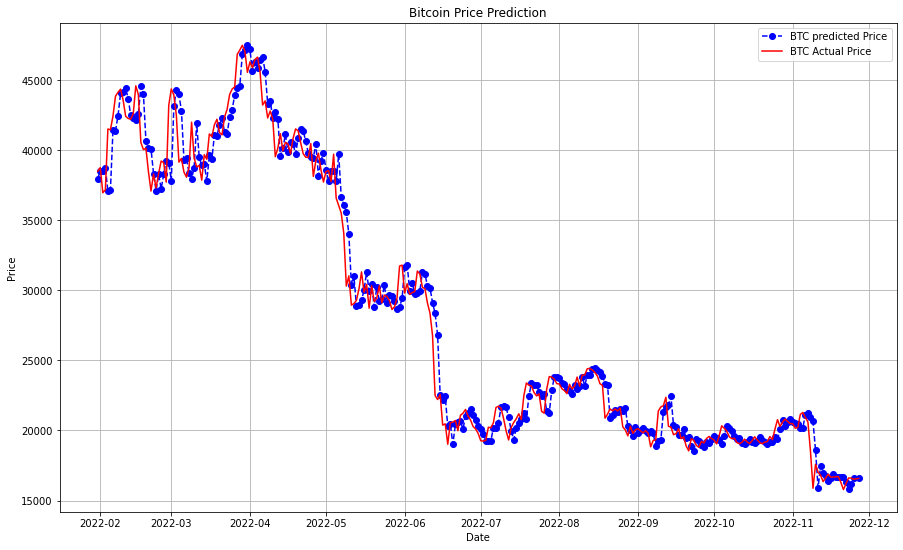

In [15]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = df[to_row:].index

plt.plot(date_range, model_predictions[:-1], color='blue', marker='o', linestyle='dashed', label='BTC predicted Price')
plt.plot(date_range, testing_data, color='red', label='BTC Actual Price')

plt.title('Bitcoin Price Prediction')
plt.xlabel("Date")
plt.ylabel('Price')
plt.legend()
plt.show()

In [16]:
#performance

#mean absolute precentage error
mape = np.mean(np.abs(np.array(model_predictions[:-1]) - np.array(testing_data))/np.abs(testing_data))
print('MAPE: '+str(mape))

MAPE: 0.03583424004450469
